In [4]:
import torch
import numpy as np
import matplotlib
# matplotlib.use("Qt5Agg")
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar


plt.rcParams.update({'figure.max_open_warning': 0})


def plot(suptitle, imgs, ax_titles,
             save=None, grid=None, figsize=None):
    assert isinstance(imgs,      (list, tuple))
    assert isinstance(ax_titles, (list, tuple))
    assert len(imgs) == len(ax_titles), f"len img({len(imgs)}) and ax_title({len(ax_titles)} must be same)"
 
    if grid is None:
        grid = (1, len(imgs))

    if figsize is None:
        figsize = (6 * len(imgs), 6)
    
    assert isinstance(grid, (list, tuple)), "Grid must be 2d list, tuple"
    assert (grid[0] * grid[1] == len(imgs)), "Grid must be same with len of imgs"

    plt.figure()

    fig, xys = plt.subplots(grid[0], grid[1], figsize=figsize)

    if len(imgs) == 1:
        xys = [xys]

    if grid[0] > 1:
        xys = [p for x in xys for p in x]

    fig.suptitle(suptitle, fontsize=20, y=0.92)

    for xy, img, title in zip(xys, imgs, ax_titles):
        if isinstance(img, torch.Tensor):
            img = img.cpu().numpy()[0][0]

        xy.set_title(title, fontsize=14)
        ax_locator = make_axes_locatable(xy)
        yz  = ax_locator.append_axes("bottom", "50%", pad="5%")
        xz  = ax_locator.append_axes("left",   "50%", pad="5%")
        color_ax = ax_locator.append_axes("right",  "5%",  pad="5%")
        
        yz.xaxis.set_visible(False)
        xz.yaxis.set_visible(False)

        def draw_box(ax, _img, axis=0):
            _img = _img.max(axis)
            if axis == 2:
                _img = _img.T

            ax_im = ax.imshow(_img)
            if axis == 0:
                colorbar(ax_im, cax=color_ax)

        draw_box(xy, img, 0)
        draw_box(yz, img, 1)
        draw_box(xz, img, 2)
        
    if save is None:
        plt.show()
    else:
        plt.savefig(save)
    plt.close()

    

/home/user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  


<Figure size 432x288 with 0 Axes>

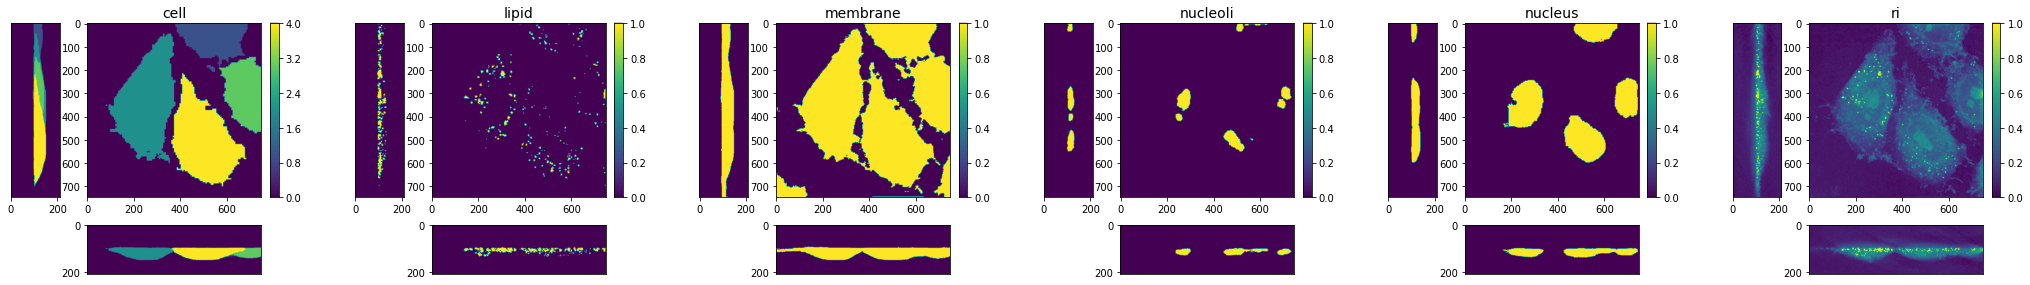

In [6]:
import os 
import h5py

from glob import glob 

file = glob(os.path.join('./save', '*'))[0]
names = []
imgs = []
with h5py.File(file, 'r') as hdf:
    for item in list(hdf):
        names.append(item)
        imgs.append(hdf[item][...])
plot('', imgs, names)
        